In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [7]:
# 데이터 로드
df = pd.read_csv("ts2000_y_processed_v1.csv")
df.head()


,Unnamed: 0,corp_nm,stock_code,year,자산총계_당기,자산총계_전기,비유동자산_당기,비유동자산_전기,유동자산_당기,유동자산_전기,...,당기순이익_전기,재고자산_당기,재고자산_전기,매출채권_당기,매출채권_전기,매출채권및기타유동채권_당기,매출채권및기타유동채권_전기,총현금흐름_당기,총현금흐름_전기,is_defaulted
0,0,(주)CMG제약,58820,2015,56591972.0,58127098.0,30261207.0,29767275.0,26330765.0,28359823.0,...,171502.0,5455617.0,4913103.0,15838056.0,16787073.0,12405117.0,13533700.0,-6259636.0,-12880662.0,0
1,1,(주)CMG제약,58820,2016,110979867.0,56591972.0,32207666.0,30261207.0,78772201.0,26330765.0,...,-3648668.0,6393756.0,5455617.0,14435808.0,15838056.0,12748287.0,12405117.0,-413245.0,-6259636.0,0
2,2,(주)CMG제약,58820,2017,109568153.0,110979867.0,28340823.0,32207666.0,81227330.0,78772201.0,...,1693463.0,7904518.0,6393756.0,16768648.0,14435808.0,15507312.0,12748287.0,1652143.0,-413245.0,0
3,3,(주)CMG제약,58820,2018,114379880.0,109568153.0,33009465.0,28340823.0,81370415.0,81227330.0,...,2834901.0,8572582.0,7904518.0,19030822.0,16768648.0,17706490.0,15507312.0,9665998.0,1652143.0,0
4,4,(주)CMG제약,58820,2019,192243166.0,114379880.0,41659100.0,33009465.0,150584066.0,81370415.0,...,6065026.0,9048933.0,8572582.0,21676515.0,19030822.0,21160960.0,17706490.0,5105725.0,9665998.0,0


Before SMOTE:
is_defaulted
0    21740
1       93
Name: count, dtype: int64


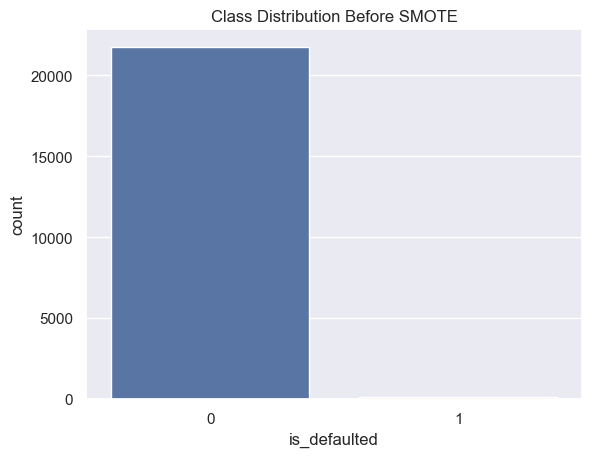

In [8]:
print("Before SMOTE:")
print(df['is_defaulted'].value_counts())

sns.countplot(x='is_defaulted', data=df)
plt.title("Class Distribution Before SMOTE")
plt.show()


In [9]:
# 원-핫 인코딩 및 결측값 제거
X = df.drop(columns=['is_defaulted'])
y = df['is_defaulted']
X_encoded = pd.get_dummies(X, columns=['corp_nm'])
X_encoded = X_encoded.dropna()
y = y.loc[X_encoded.index]  # 동기화


In [10]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close

After SMOTE:
is_defaulted
0    15305
1    15305
Name: count, dtype: int64


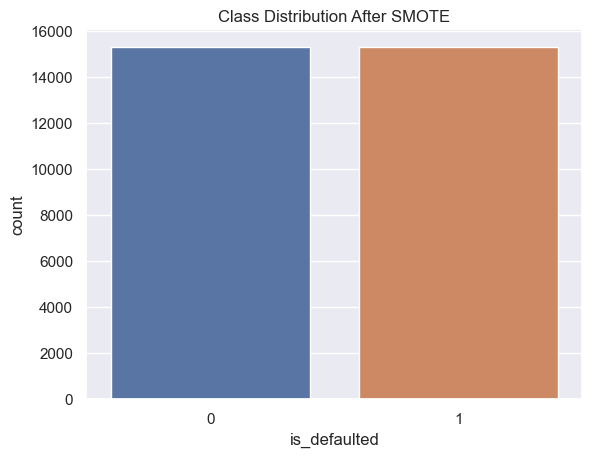

In [11]:
print("After SMOTE:")
print(y_resampled.value_counts())

sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()
